<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет еще раз. Опять де я не вижу полностью выполненного проекта. Если у тебя наблюдаются проблемы с отправкой работы, пожалуйста, разберись с этим с техподдержкой. Приступить к проверке неполностью выполненного проекта я не могу. Буду ждать полную версию работы :)

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 0.1</b></font>

Привет! Спасибо, что прислала задание:) Меня зовут Слепцов Артем и я буду проверять твой проект) Перед началом проверки проекта он должен быть готов полностью, а также код не должен выдавать ошибок. Исправь это, выполни работу полностью и присылай его снова. Буду ждать :)
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера 0.1</b></font>

Я заметил, что ячейки в твоей тетрадке начинаются не с 1. Перед отправкой работы рекомендую перезапускать ноутбук, чтобы убедиться, что все ячейки выполняются корректно.

</div>

Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

Прочитаем файл games.csv и сохраним его в переменной df.

In [2]:
df = pd.read_csv('/Users/satayevaaidok/Desktop/games.csv')

Получение первых 10 строк таблицы:

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Общая информация о данных таблицы df.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Выводы:данные по крайней мере в хорошем состоянии для анализа, но тем не менее достаточно проблемных ситуации здесь. Очень много пустых значении и неправильные типы данных в некоторых столбцах , давайте исправим это и сделаем анализ данным.

# Предобработка данных

In [6]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Видим , что имена столбцов представлен в неудобных нам видах. Давайте приведем столбцов к нижнему регистру. 


Проверим результат.

In [7]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Отлично, имена столбцов в удобных видах для наших работ. 

#### Давайте поработаем над пропусками:

Сначала проверим сколько у нас пропусков в данных:

In [8]:
df.isnull().sum() 

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

#### Перед тем как начать обрабатывать пропуски и все данные , давайте посмотрим насколько у нас потеряны данные .

Сперва посчитаем проценты наших потерь :

In [9]:
percentage = (df.isnull().sum()/df.shape[0]*100).sort_values()
print(percentage)

platform            0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
name                0.011965
genre               0.011965
year_of_release     1.609333
user_score         40.089740
rating             40.478612
critic_score       51.319174
dtype: float64


Мы посмотрели все пропуски в данных и самые большие потери у нас в трех столбцах - это 'critic_score','user_score', 'rating', давайте визуализируем это диаграммой pie

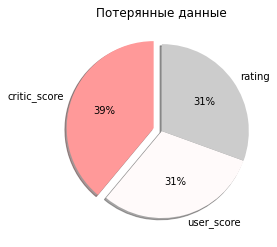

In [10]:
labels = ['critic_score','user_score', 'rating']
sizes = [51, 40, 40]
explode = (0.1, 0, 0)
colors = ['#ff9999','#fffafa','#cccccc']
fig, ax = plt.subplots()
plt.title('Потерянные данные')
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%',
        shadow=True, startangle=90)
plt.show()

Вывод:
Наибольшие потери произошли с оценках критиков. По диаграмме и данным мы видим, что пропуски больше в тех столбцах - где оценки игр, где рейтинг и оценка.

###### Теперь продолжим заниматься пропусками:

Узнаем какие это пропуски , посмотрев все уникальные значения тех столбцов , где есть пропуски.

In [11]:
print(df['name'].unique())
print()
print(df['year_of_release'].unique())
print()
print(df['genre'].unique())
print()
print(df['critic_score'].unique())
print()
print(df['user_score'].unique())
print()
print(df['rating'].unique())


['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2'

Пропуски обычные , и вполне ожидаемые 'nan', но в столбце видим какое-то неведомое значение 'tbd'

По источникам интернета TBD - это аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено).

Но сначала , давайте начнем обрабатывать пустые данные с столбцов с типами 'object'-то есть , текстовыми данными. 

Пустые значения в столбцах 'name','genre','rating'-мы можем переименовать как 'unknown'.После этой операции нужно убедиться, что таблица больше не содержит пропусков.

In [12]:
df['name'] = df['name'].fillna('unknown')
df['genre'] = df['genre'].fillna('unknown')
df['rating'] = df['rating'].fillna('unknown')
df.isnull().sum() 


name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating                0
dtype: int64

Остались теперь числовые пропуски , давайте подумаем как и чем можно заменить и обработать данные.

Начнем обработку со столбца 'year_of_release'.Мы не можем заменить пропуски медианой всех данных этого столбца или же средним значением, потому что можем указать неверные данные и это может привезти неправильному анализу и результаты могут выйти некорректными. 

Наилучшим решением может быть только заменить на тот год, который совсем не наступил или же было ну-очень давно, например 0 или 4000. Хочу обоснавать это тем , что мы не уадляем данные и данные не теряются, но так как в этом столбце пропуски незначительные мы можем заменить без каких-либо больших погрешностей .
Я заполнила пустые значение 4000.

In [13]:
df['year_of_release'] = df['year_of_release'].fillna(4000)

Продолжим обработку пустых значении.Теперь рассмотрим столбец 'critic_score'

In [14]:
df['critic_score'] = df['critic_score'].fillna(-5)

Остался теперь столбец 'user_score' с необычными пропусками 'tbd'.

Впервую очередь давайте обработаем значения 'tbd'. Как я поняла расшифровывается это аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено).

То тогда , 'tbd'- для нас тот же самый 'nan',заменяем его на 'nan'

In [15]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = float('nan')

Теперь рассмотрим пустые значения этого столбца. Значения этого столбца колеблется от 0-10 , это отзывы юзеров игры. Чем же может обработать значения?

Здесь такая же история , как с 'critic_score'.
Мы не можем заменить числами от 0 до 10, ведь наш анализ может получиться некорректным.
Заменим пустые значения так же как в 'critic_score'=-5

In [16]:
df['user_score'] = df['user_score'].fillna(-5)

Проверим результат.

In [17]:
df.isnull().sum() 

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Проверим данные на дубликаты, чтобы если что их удалить.

In [18]:
print(f'Всего {df.duplicated().sum()} дубликатов')

Всего 0 дубликатов


#### Отлично , все пропуски обработаны.Дубликатов в данных нет. Теперь давайте настроем все типы данных столбцов нормально, как должно быть.

Первый вопрос возник по поводу столбца годов релиза. Почему тип данных годов , где только может быть целые числа -это float.Давайте заменим тип данных столбца 'year_of_release'- на int,то есть на тип данных целых чисел.

In [19]:
df['year_of_release'] = df['year_of_release'].astype(int)

Теперь тип данных оценки пользователей - object ,то есть из-за проспусков и 'tbd' значения тип стал текстовым , что надо теперь исправить.Исправим тип на данных с плавающей точкой - float

In [20]:
df['user_score'] = df['user_score'].astype(float)

Проверим результат.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Давайте для каждой игры посчитаем суммарные продажи и добавим этот столбец на наш основной df.Проверим результат.

In [22]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['other_sales'] + df['jp_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-5.0,-5.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-5.0,-5.0,unknown,31.38


#  Исследовательский анализ

Посмотрим, сколько игр выпускалось в разные годы. 

In [23]:
games_per_year = df.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
games_per_year.sort_values(by='year_of_release')

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Теперь визуализируем данные:

<AxesSubplot:xlabel='year_of_release', ylabel='count'>

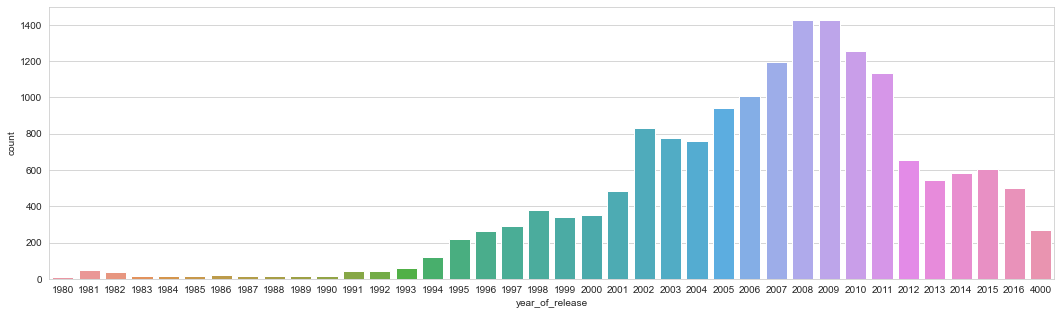

In [24]:
df_platform = df.pivot_table(index=['year_of_release', 'platform'], values='total_sales').sort_values(by=('total_sales'),ascending=False).reset_index()
sns.set_style('whitegrid')
plt.figure(figsize=(18, 5))
sns.countplot(data = df, x='year_of_release')

По диаграмме видно, что в 2008 -2009 был пик разработки игр. С 1991 года все хорошо начало расти и с 2010 начался спад дохода игр. Есть предположения , что это пришло к финансовому кризису  или же это время пришло в то время на рост мобильных игр и популяризациии мобильных телефонов.

#### Посмотрим , как менялись продажи по платформам

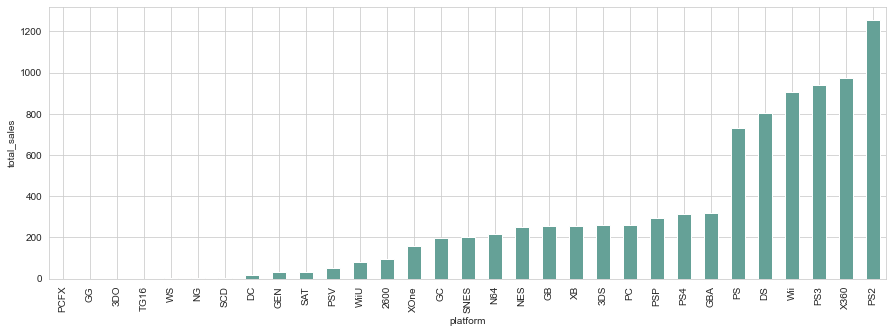

In [25]:

df.groupby('platform')['total_sales'].sum().sort_values().plot(kind = 'bar', figsize = (15, 5), y='year_of_release', color='#65a197')
plt.xlabel('platform')
plt.ylabel('total_sales');

 Топ наиболее прибыльных платформ: PS2, X360, PS3, Wii, DS.

Самый прибыльная платформа  в истории -это PS2 - Игровая приставка, ставшая наиболее быстро продаваемой и самой популярной игровой консолью в истории.

Xbox 360 — вторая по счёту игровая приставка компании Microsoft, которая последовала за Xbox.

PS3-игровая приставка седьмого поколения, третья в семействе игровых систем PlayStation. С помощью PS3 можно играть, смотреть фильмы, слушать музыку, отправлять электронную почту и просматривать веб-страницы. С самого момента выпуска приставкой поддерживается большинство игр для консолей предыдущего поколения, PlayStation и PlayStation. Главными конкурентами консоли являются Xbox 360 от Microsoft и Wii от Nintendo 

#### Рассмотрим продолжительность жизни платформ, а также визуализируем их:

In [26]:
info_plat = df['platform'].unique().tolist()
info_est = []
info_dur = []
info_death = []

In [27]:
for i in info_plat:
    d = len(df.loc[(df['platform']==i)&(df['year_of_release']!=4000), 'year_of_release'].unique())
    info_dur.append(d)
    e = df.loc[(df['platform']==i)&(df['year_of_release']!=4000), 'year_of_release'].min()
    info_est.append(e)
    death = d + e - 1
    info_death.append(death)

In [28]:
df_1 = {'platform name':info_plat, 'platform life':info_dur, 'year of release platform':info_est, 'year of death':info_death}

In [29]:
platform = pd.DataFrame(df_1)
platform

,platform name,platform life,year of release platform,year of death
0,Wii,11,2006,2016
1,NES,12,1983,1994
2,GB,13,1988,2000
3,DS,11,1985,1995
4,X360,12,2005,2016
5,PS3,11,2006,2016
6,PS2,12,2000,2011
7,SNES,10,1990,1999
8,GBA,8,2000,2007
9,PS4,4,2013,2016


<AxesSubplot:xlabel='platform life', ylabel='platform name'>

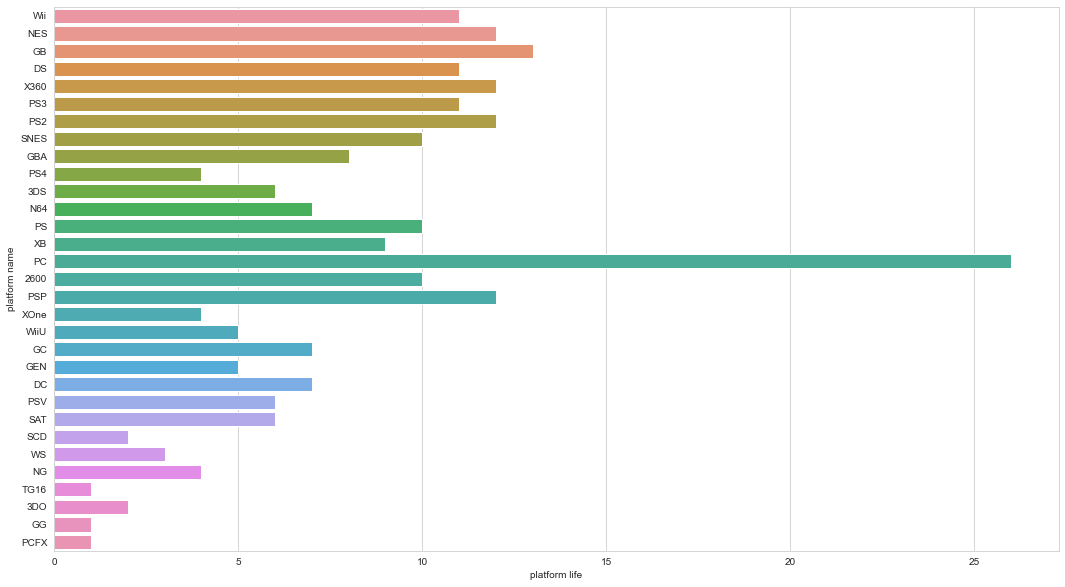

In [30]:
sns.set_style('whitegrid')
plt.figure(figsize=(18, 10))
sns.barplot(data = platform, x='platform life', y='platform name')

In [31]:
average = platform['platform life'].mean()
print(f"Средняя продолжительность жизни платформы составляет {average:.1f} лет.")

Средняя продолжительность жизни платформы составляет 7.7 лет.


Мы видим, что в целом средняя продолжительность жизни платформы составляем почти 8 лет, а платформой с самой продолжительной жизнью оказалось PC , что не удивительно. PC это самая практичная платформа, где можно было очень много делать, и в этом была ее изюминка- продолжительность ее жизни и актуальность на долгое время.

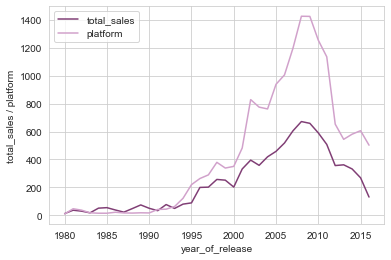

In [32]:
df[df['year_of_release'] != 4000].groupby('year_of_release')['total_sales'].sum().plot(legend=True, color = '#803e75')
df[df['year_of_release'] != 4000].groupby('year_of_release')['platform'].count().plot(legend=True, grid=True, color = '#d1a1cb')
plt.xlabel('year_of_release')
plt.ylabel('total_sales / platform')
plt.show()

По диаграмме мы видим число игр  и их выручку за период от 1980-2016.С 2000 годов, мы видим значительный рост по числу платформ, но выруска повысилась не совсем значительно , чем числа платформ. И в 2007 году , неожиданно все пошло на спад ,и числа платформ ,и выручки из игр 

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

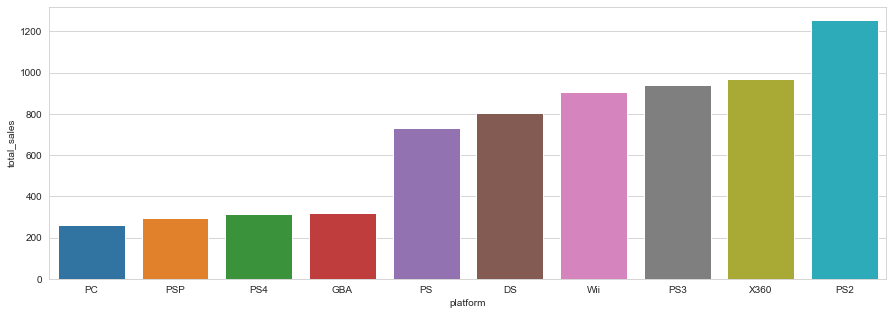

In [33]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
pl_sales = df.pivot_table('total_sales', index = 'platform', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = True).tail(10)
pls = pd.DataFrame(data=pl_sales).reset_index()
sns.barplot(data = pls, x='platform', y='total_sales')

За все время , мы видим что самые прибыльные платформы оказались: PS2, X360,PS3,Wii,DS,PS.Несмотря на то, что PC по продолжительности жизни лидер, но по продажам он в 4 раза меньше чем PS2

Теперь рассмотрим , каким образом меняются результаты ,если расссматривать только 2010-2016 годы. Так как в эти годы мы видим некоторые изменения в разных ситуациях и будет интересно это рассмотреть:

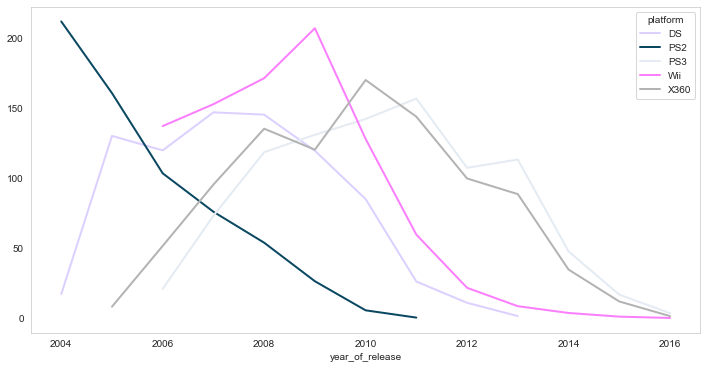

In [34]:
top_6 = pls['platform'].tail(6)
colors=['#dcd0ff','#0a4761','#e4ebf2','#fb7efd','#b3b3b3','#8b6c62']
year_2016 = pd.DataFrame(df[(df['year_of_release'] >= 2004) & (df['year_of_release'] <= 2016) & (df['platform'].isin(top_6))]).pivot_table(values = 'total_sales', index = 'year_of_release', columns = 'platform', aggfunc = 'sum')
year_2016.plot(figsize=(12, 6), lw=2, alpha=1, color=colors)
plt.grid()
plt.show()

По графику видно, что продолжительность жизни самых прибыльных топ 6 платформ оказалось не такими продолжительными. 

In [35]:
year_2014 = platform[platform['year of release platform'] >= 2011]
y14 = year_2014['platform name'].to_list()
y14.append('PC')
year_2014

,platform name,platform life,year of release platform,year of death
9,PS4,4,2013,2016
10,3DS,6,2011,2016
17,XOne,4,2013,2016
18,WiiU,5,2012,2016
22,PSV,6,2011,2016


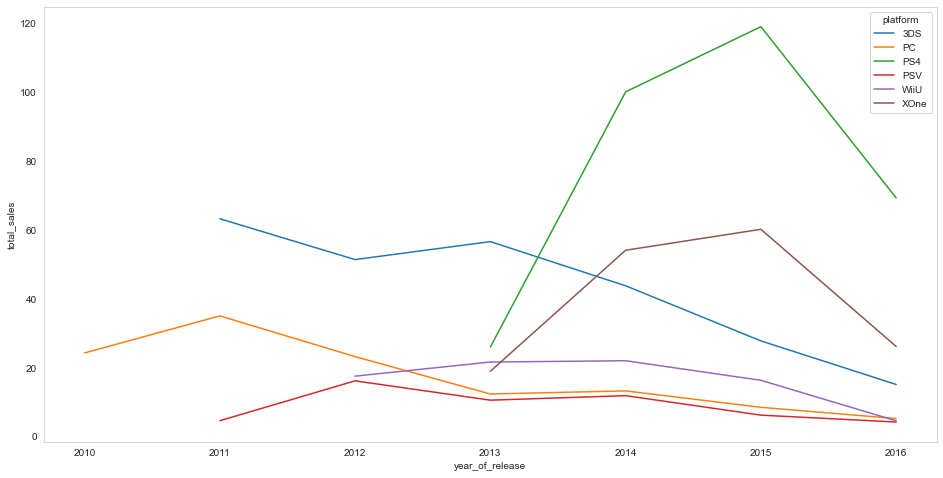

In [36]:
years_2010_2016=df.query('year_of_release >= 2010 & platform in @y14 & year_of_release != 4000').groupby(['platform','year_of_release'])['total_sales'].agg('sum').reset_index()
plt.figure(figsize=(16,8))
sns.set_style('whitegrid')
sns.lineplot(x='year_of_release',y='total_sales',hue='platform',markers=True, data=years_2010_2016)
plt.grid()

По графику видно, что прогрессируемая и наиболее активная в сфере разработки игр это с начала 2013 , и лучше рассматривать с этого времени чтобы не было каких-либо искажении в рассчетах.До 2016 года многие платформы уже исчезли с рынка и впали в убытки .За вск это время наиболее прибыльными оказались платформы PS4, XOne.
Выбор периода времени с 2014 года связан с тем, что резкий спад платформы может произойти буквально за 3 года. Видим, что лидер по продажам за всю историю PS2. Но продажи к 2011 году уже нулевые. X360 был на пике в 2010, но к 2016 упал почти до 0.

#####  Выводы:   
За время 2010-2016 самой прибыльной платформой оказалась платформа появившаяся в 2013 году- PS4, его пик около 120 млн.

На втором месте оказалась XOne -тоже родившаяся в 2013 году , прибыль около 60 млн.

##### Построем  «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам:

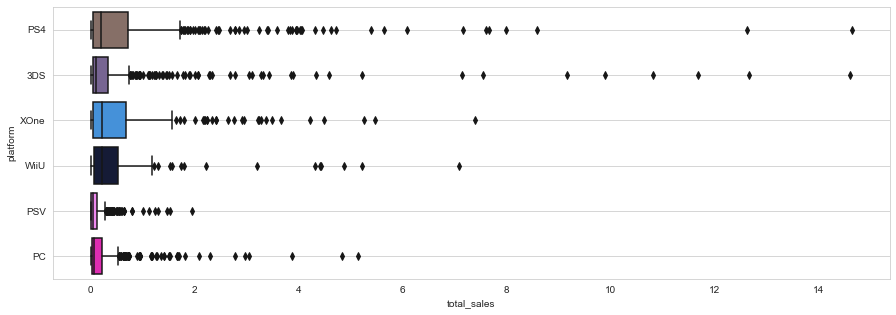

In [37]:
plt.figure(figsize=(15,5))
colors=['#8b6c62','#755d9a','#2c92f2','#10183b','#ff77ff','#fc0fc0']
sns.boxplot(y='platform', x='total_sales', data = df.query('year_of_release >= 2010 & platform in @y14 & year_of_release != 4000'), order=y14,palette = colors)
plt.grid()
plt.show()

По графику можно посмотреть , что продажи PS4 and XOne довольно одиннаковые. Но исключительные уникальные релизы у PS4 кажутся больше.

In [38]:
print(df['critic_score'].corr(df['total_sales']))
#посчитали корреляцию

0.1456511455894011


Распределение игр по жанрам.

In [39]:
df_genre = df.pivot_table(index=['genre'], values='total_sales', aggfunc='sum').sort_values(by='total_sales',ascending=False)
df_genre



,total_sales
genre,
Action,1744.17
Sports,1331.27
Shooter,1052.45
Role-Playing,934.56
Platform,827.77
Misc,802.51
Racing,728.67
Fighting,447.53
Simulation,389.97


Самые популярные жанры это - Action, Sports, Shooter

In [40]:
df_critic_score_5=df[df['critic_score'] == (-5)]['critic_score'].count()
print(f"Не оцененные критиками игры - {df_critic_score_5}")
df_critic_score_0=df[df['critic_score'] != (-5)]['critic_score'].count()
print(f"Оцененные критиками игры - {df_critic_score_0}")
print()
df_user_score_5=df[df['user_score'] == (-5)]['user_score'].count()
print(f"Не оцененные пользователями игры - {df_user_score_5}")
df_user_score_0=df[df['user_score'] != (-5)]['user_score'].count()
print(f"Оцененные пользователями игры - {df_user_score_0}")


Не оцененные критиками игры - 8578
Оцененные критиками игры - 8137

Не оцененные пользователями игры - 9125
Оцененные пользователями игры - 7590


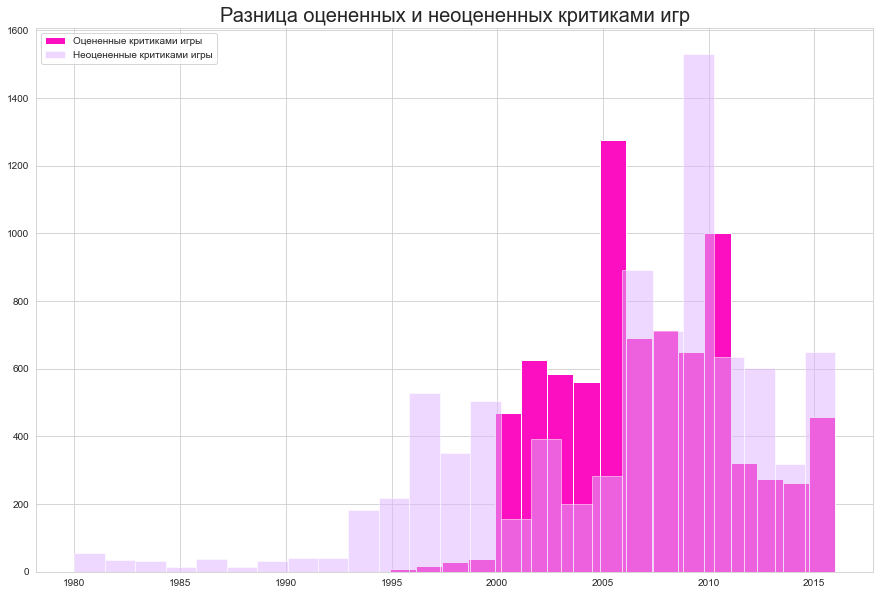

In [41]:
plt.figure(figsize=(15, 10))
df[(df['year_of_release'] != 4000) & (df['critic_score'] > 0)]['year_of_release'].hist(bins=25, color = '#fc0fc0')
df[(df['year_of_release'] != 4000) & (df['critic_score'] == (-5))]['year_of_release'].hist(bins=25, alpha=0.5, color = '#e0b3ff')
plt.title('Разница оцененных и неоцененных критиками игр', fontsize = 20)
plt.legend(['Оцененные критиками игры', 'Неоцененные критиками игры']);

Гистаграмма указывает разницу оцененных и неоцененных критиками игр. По гистограмме понятна , что число неочененных критиками игр намного превышает .

Теперь построим гистограмму для чисел пользовательской оценки, что приводит анологичные результаты :

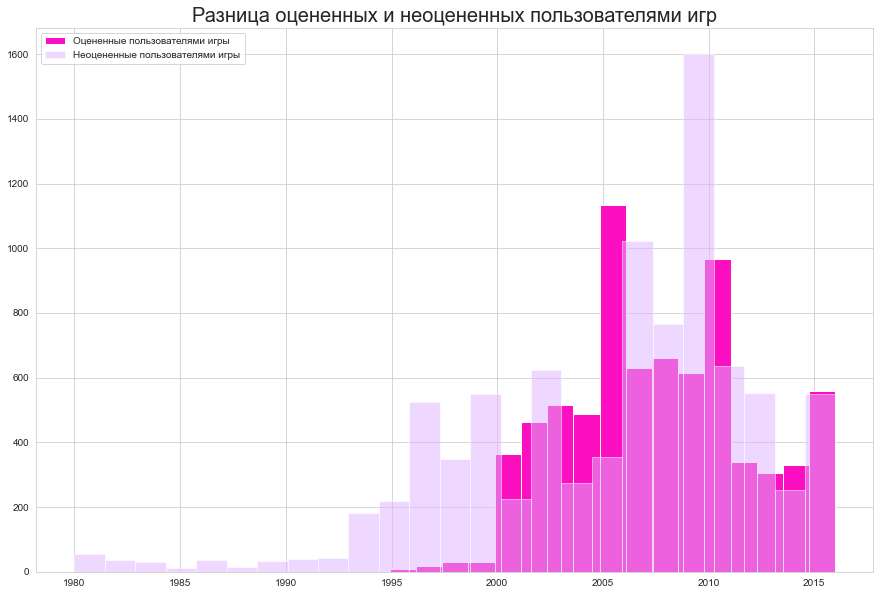

In [42]:
plt.figure(figsize=(15, 10))
df[(df['year_of_release'] != 4000) & (df['user_score'] > 0)]['year_of_release'].hist(bins=25, color = '#fc0fc0')
df[(df['year_of_release'] != 4000) & (df['user_score'] == (-5))]['year_of_release'].hist(bins=25, alpha=0.5, color = '#e0b3ff')
plt.title('Разница оцененных и неоцененных пользователями игр', fontsize = 20)
plt.legend(['Оцененные пользователями игры', 'Неоцененные пользователями игры']);

Давайте рассмотрим приставку PS2, которая является самой прибыльной платформой в истории.

In [43]:
PS2 = df[(df['platform'] == 'PS2') & (df['critic_score'] > 0) & (df['user_score'] > 0) & (df['year_of_release'] != 4000)]

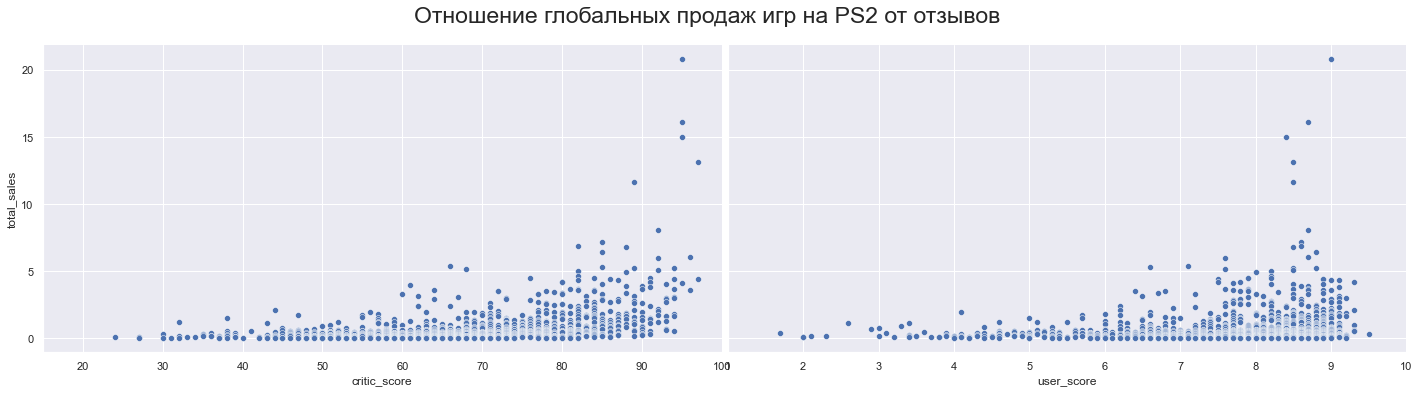

In [44]:
PS2 = df.query('platform in @top_6').loc[(df.query('platform in @top_6')['platform'] == 'PS2')]
sns.set()
ax = sns.pairplot(PS2, x_vars=['critic_score','user_score'], y_vars=['total_sales'], height=5, aspect=2)
ax.axes[0,0].set_xlim((15,100))
ax.axes[0,1].set_xlim((1, 10))
ax.fig.suptitle("Отношение глобальных продаж игр на PS2 от отзывов", y=1.08, size=23)
plt.show()

Построим корреляцию:

In [45]:
PS2[['total_sales', 'critic_score','user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.295104,0.251294
critic_score,0.295104,1.000000,0.805875
user_score,0.251294,0.805875,1.000000


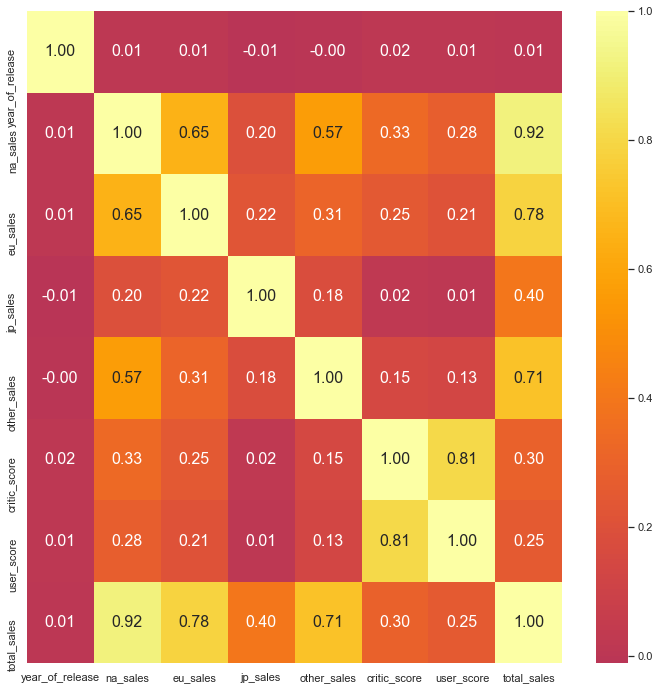

In [46]:
plt.figure(figsize=(12,12))
sns.heatmap(PS2.corr(), annot=True, cmap='inferno', fmt='.2f', annot_kws={'size':16}, center = 0);

Выше указаны отношения всех нумерическиx значений собранных данных

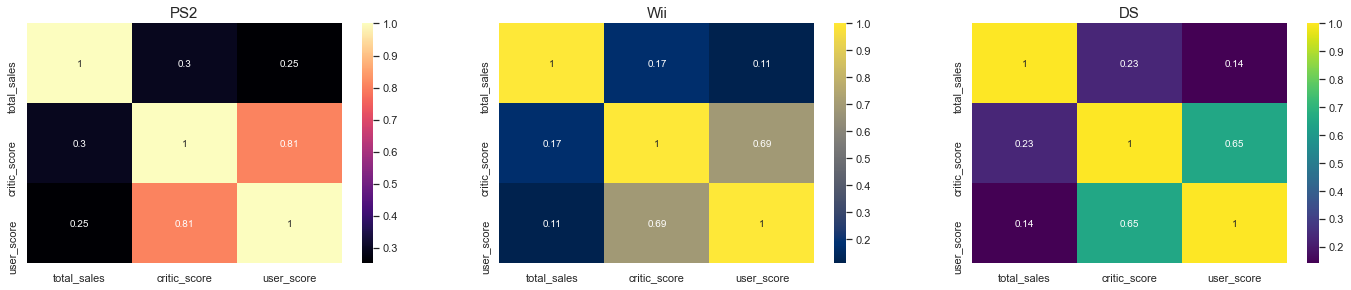

In [47]:
size = plt.figure(figsize=(24,15))
ax1 = size.add_subplot(3, 3, 1)
ps2 = PS2[['total_sales', 'critic_score', 'user_score']]
ax1 = sns.heatmap(ps2.corr()[['total_sales', 'critic_score', 'user_score']].sort_values(by='total_sales', ascending=False), cmap='magma', annot=True, annot_kws={'size':10}, ax = ax1)
ax1.set_title('PS2', fontsize = 15)
ax3 = size.add_subplot(3, 3, 3)
DS = df[(df['platform'] == 'DS') & (df['critic_score'] > 0) & (df['user_score'] > 0) & (df['year_of_release'] != 4000)]
data_ds = DS[['total_sales', 'critic_score', 'user_score']]
ax3 = sns.heatmap(data_ds.corr()[['total_sales', 'critic_score', 'user_score']].sort_values(by='total_sales', ascending=False), cmap='viridis', annot=True, annot_kws={'size':10}, ax = ax3)
ax3.set_title('DS', fontsize = 15)
ax2 = size.add_subplot(3, 3, 2)
Wii = df[(df['platform'] == 'Wii') & (df['critic_score'] > 0) & (df['user_score'] > 0) & (df['year_of_release'] != 4000)]
data_wii = Wii[['total_sales', 'critic_score', 'user_score']]
ax2 = sns.heatmap(data_wii.corr()[['total_sales', 'critic_score', 'user_score']].sort_values(by='total_sales', ascending=False), cmap='cividis', annot=True, annot_kws={'size':10}, ax = ax2)
ax2.set_title('Wii', fontsize = 15);


Выше указаны отношения продаж платформ :PS2, Wii,DS

# Самые популярные платформы (топ-5). Опишите различия в долях продаж:

Самые популярные платформы (топ-5)продажи в Северной Америке

In [48]:
df_na_sales= df.pivot_table(index=['platform'],values='na_sales',  aggfunc='sum').sort_values(by='na_sales',ascending=False)
df_na_sales.head()


,na_sales
platform,
X360,602.47
PS2,583.84
Wii,496.90
PS3,393.49
DS,382.40


Самые популярные платформы (топ-5)продажи в Европе

In [49]:
df_eu_sales= df.pivot_table(index=['platform'], values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False)
df_eu_sales.head()

,eu_sales
platform,
PS2,339.29
PS3,330.29
X360,270.76
Wii,262.21
PS,213.61


Самые популярные платформы (топ-5)продажи в Японии

In [50]:
df_jp_sales=df.pivot_table(index=['platform'], values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False)
df_jp_sales.head()

,jp_sales
platform,
DS,175.57
PS,139.82
PS2,139.20
SNES,116.55
3DS,100.67


###### Вывод: в Америке доля продаж намного больше, в Европе среднее, а в Японии совсем мало. Папуляризацию DS в Японии можно обьяснить тем, что Японимя сама маленькая страна и там  все маленькое и приставки DS он очень удобный , чтобы брать с собой и намного лучше воспринимается японцам.

# Самые популярные жанры (топ-5)

Самые популярные жанры (топ-5)продажи в Северной Америке

In [51]:
df_na_genres=df.pivot_table(index=['genre'], values='na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False)
df_na_genres.head()


,na_sales
genre,
Action,879.01
Sports,684.43
Shooter,592.24
Platform,445.50
Misc,407.27


Самые популярные жанры (топ-5) продажи в Европе

In [52]:
df_eu_genres=df.pivot_table(index=['genre'], values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False)
df_eu_genres.head()


,eu_sales
genre,
Action,519.13
Sports,376.79
Shooter,317.34
Racing,236.51
Misc,212.74


Самые популярные жанры (топ-5)продажи в Японии

In [53]:
df_jp_genres=df.pivot_table(index=['genre'], values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False)
df_jp_genres.head()


,jp_sales
genre,
Role-Playing,355.41
Action,161.43
Sports,135.54
Platform,130.83
Misc,108.11


######  Вывод: жанр Action  популярнее всех, так как Америка и Европа немного схожа по менталитету- Action  у них лидирует, В Японии- как мы знаем родина аниме , Role-Playing лидирует

# Влияет ли рейтинг ESRB на продажи в отдельном регионе?

рейтинг ESRB на продажи в Америке

In [54]:
df_without_unknown=df[df['rating']!='unknown']
df_na_esrb=df_without_unknown.pivot_table(index=['rating'], values='na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False)
df_na_esrb.head()


,na_sales
rating,
E,1292.99
T,759.75
M,748.48
E10+,353.32
K-A,2.56


рейтинг ESRB на продажи в Европе

In [55]:
df_without_unknown=df[df['rating']!='unknown']
df_eu_esrb=df_without_unknown.pivot_table(index=['rating'], values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False)
df_eu_esrb.head()


,eu_sales
rating,
E,710.25
M,483.97
T,427.03
E10+,188.52
AO,0.61


рейтинг ESRB на продажи в Japan

In [56]:
df_without_unknown=df[df['rating']!='unknown']
df_jp_esrb=df_without_unknown.pivot_table(index=['rating'], values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False)
df_jp_esrb.head()


,jp_sales
rating,
E,198.11
T,151.40
M,64.24
E10+,40.20
K-A,1.46


Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.

«E»(«Everyone») — «Для всех»: для возрастной категории от 6 лет и старше; такие игры могут понравиться и взрослым. Первоначально "K-A" ("Kids to Adults")

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше.

«M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет

«AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.

«RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

#### Вывод:Cамые прибыльные ограничения это E- для всех , M- для взрослых 17+,T-подросткам 13+

## Проводим исследование статистических показателей

#### Укажем  как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах

In [57]:
df_ex = df[(df['critic_score'] > 0) & (df['user_score'] > 0) & (df['year_of_release'] != 4000)]

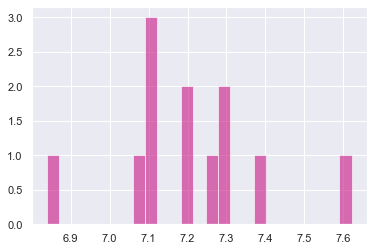

In [58]:
user = df_ex.pivot_table(index='genre', values='user_score', aggfunc='mean')
user['user_score'].hist(bins = 25, alpha = 0.6, color = '#c71585');

In [59]:
user.sort_values(by = 'user_score', ascending = False)

,user_score
genre,
Role-Playing,7.620979
Platform,7.377171
Strategy,7.307194
Fighting,7.302111
Puzzle,7.250847
Simulation,7.191722
Adventure,7.190530
Racing,7.110751
Action,7.099453


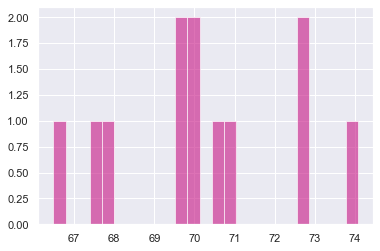

In [60]:
critic = df_ex.pivot_table(index='genre', values='critic_score', aggfunc='mean')
critic['critic_score'].hist(bins = 25, alpha = 0.6, color = '#c71585');

In [61]:
critic.sort_values(by = 'critic_score', ascending = False)

,critic_score
genre,
Sports,74.070452
Strategy,72.856115
Role-Playing,72.823776
Shooter,70.968894
Puzzle,70.694915
Platform,70.000000
Simulation,69.983444
Fighting,69.693931
Racing,69.621160


# Дисперсия и стандартное отклонение:

Данные оценок пользователей:

In [62]:
userr = user['user_score'].to_list()

variance_estimate_user = np.var(userr, ddof = 1)
print(f'Дисперсия равна - {variance_estimate_user}')
standard_deviation_user = np.std(userr)
print(f'Стандартное отклонение равна - {standard_deviation_user}')

Дисперсия равна - 0.036620167893054174
Стандартное отклонение равна - 0.183217049521325


Данные оценок критиков:

In [63]:
cr = critic['critic_score'].to_list()

variance_estimate_user = np.var(cr, ddof = 1)
print(f'Дисперсия равна - {variance_estimate_user}')
standard_deviation_user = np.std(cr)
print(f'Стандартное равна - {standard_deviation_user}')

Дисперсия равна - 5.23442839809534
Стандартное равна - 2.1904853415595813


## Проверим  гипотезы

###### 1.Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [64]:
xone = df[(df['platform'] == 'XOne') & (df['user_score'] > 0) & (df['year_of_release'] != 4000)]['user_score']
pc = df[(df['platform'] == 'PC') & (df['user_score'] > 0) & (df['year_of_release'] != 4000)]['user_score']

In [65]:
p = st.ttest_ind(xone, pc, equal_var= True)[1]
alpha = 0.5
print(f'p-value = {p:.10f}')

p-value = 0.0000130380


In [66]:
xone_mean = xone.mean().round(2)
pc_mean = pc.mean().round(2)

In [67]:
if (p < alpha):
    print("Нулевая гипотеза отвергается", end = '')
    if xone_mean > pc_mean:
        print(f' в пользу XOne с средним значением {xone_mean}')
    else:
        print(f' в пользу PC с средним значением {pc_mean}')
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Нулевая гипотеза отвергается в пользу PC с средним значением 7.07


##### Средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой. И поэтому гипотеза неверна, совокупности разные.

### 2.Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.


Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [68]:
action = df[(df['genre'] == 'Action') & (df['user_score'] > 0) & (df['year_of_release'] != 4000)]['user_score']
sports = df[(df['genre'] == 'Sports') & (df['user_score'] > 0) & (df['year_of_release'] != 4000)]['user_score']


In [69]:
p = st.ttest_ind(action, sports, equal_var= False)[1]
alpha = 0.5
print(f'p-value = {p:.10f}')
action_mean = action.mean().round(2)
sports_mean = sports.mean().round(2)

p-value = 0.0737021742


In [70]:
if (p < alpha):
    print("Нулевая гипотеза отвергается", end = '')
    if action_mean > sports_mean:
        print(f' в пользу Action с средним значением {action_mean}')
    else:
        print(f' в пользу Sports с средним значением {sports_mean}')
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Нулевая гипотеза отвергается в пользу Action с средним значением 7.06


##### Гипотеза 2.Средние пользовательские рейтинги жанров Action и Sports разные подтвердилась.

## Вывод:

В целом, платформы с низкими уровнями и рейтингами постепенно уходят с рынка , более популярные и всемилюбимые гиганты более развиваются и улучшают свои продукты и качества . Средняя продолжительность существования платформ 8-10 лет. Рейтинг критиков является наиважными фактором для рейтингов игр и влияет на продажи  ,чем пользовательский рейтинг. Продажа-закупка игр в основном в рейтинге "для всех"  Япония отличается своим уникальным рынком.